# Python Programming Crash Course
# Born at sea

<br>
<div>
<img src="data/Python-logo-notext.svg" width="200"/>
</div>

## Introduction

Previously, we have seen how you can create plots from a <font color="green">**DataFrame**</font> directly and we have seen the basis for this,
the lego-style model kit <font color="green">**matplotlib**</font>, which offers you greater flexibility and fine-tuning. 

However, creating more complex plots can be tedious, you have to manipulate every object yourself and need to know which parameter to tweak.
Some other <font color="green">**Python**</font> packages build upon <font color="green">**matplotlib**</font> as well and they allow you to create certain types of plots more easily.

Wouldn't it be nice to just tell the computer, "Here is my data, make a scatter plot of a versus b, let markers represent c and the size of the dots correspond to d!"?

Well, here is <font color="green">**seaborn**</font>. <font color="green">**Seaborn**</font> allows you to create a bunch of statistical plots and map data values easily to certain graphical properties, so you don't have to bother with manipulating all these plot elements specifically and separately.

Instead, it uses a more semantic approach and lets you supply a data structure and specify the roles of the columns to be used in visualization. <font color="green">**Seaborn**</font> offers a high-level API, meaning that you can specify relatively complex plots with not much more than a single call without bothering much with layout and format options.

Moreover, it groups similar plots together and lets you switch between representations easily.

Also, <font color="green">**seaborn**</font> is designed to work on certain data structures, most importantly pandas <font color="green">**DataFrame**</font> and <font color="green">**Series**</font>.

If you want an overview of what plots you can do, take a look at the <font color="green">**seaborn**</font> gallery:
    
    https://seaborn.pydata.org/examples/index.html



## Prerequisites

First the imports:

In [1]:
# imports
import seaborn as sb
import numpy as np
import pandas as pd

Let's get some data:

In [2]:
# get some data ... 

df_tips = sb.load_dataset("tips")  # seaborn comes with some test data
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# get some MRI measurements ... 

df_fmri = sb.load_dataset("fmri")
df_fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [4]:
# get our monty table 

df_montys = pd.read_csv("montys.csv")
df_montys = df_montys.fillna(0)
df_montys.head()

,First Name,Name,Year,Score,Movies,Director,Writer,Awards,Birthday,Country
0,John,Cleese,1939,9.3,183,3.0,77,12,27-10-1939,England
1,Graham,Chapman,1941,8.8,29,0.0,53,1,08-01-1941,England
2,Eric,Idle,1943,9.0,87,11.0,45,2,29-03-1941,England
3,Terry,Gilliam,1940,9.2,33,19.0,31,29,22-11-1941,USA
4,Michael,Palin,1943,9.2,77,0.0,66,9,05-05-1941,England


In [6]:
# get the iris dataset 

df_iris = pd.read_csv("data/iris.csv")
df_iris = df_iris.rename(lambda x: x.replace(" (cm)", ""), axis=1)  # let's get rid of those units

# calculate the means and standard deviations
df_iris_means = df_iris.groupby("species").mean()
df_iris_std = df_iris.groupby("species").std()
display(df_iris.head())
display(df_iris_means)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal length,sepal width,petal length,petal width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## How to create plots with <font color="green">**Seaborn**</font>

<font color="green">**Seaborn**</font> essentially offers two types of functions:

1. <font color="green">**Figure-level**</font> functions : Create comprehensive visualizations and larger composite figures with a high level API. That is similar to <font color="green">**matplotlib's**</font> subplots.
2. <font color="green">**Axes-level**</font> functions : Create individual plots with more fine-tuning and granularity.

Let's see some examples:

Text(0.5, 1.0, 'Iris Dataset')

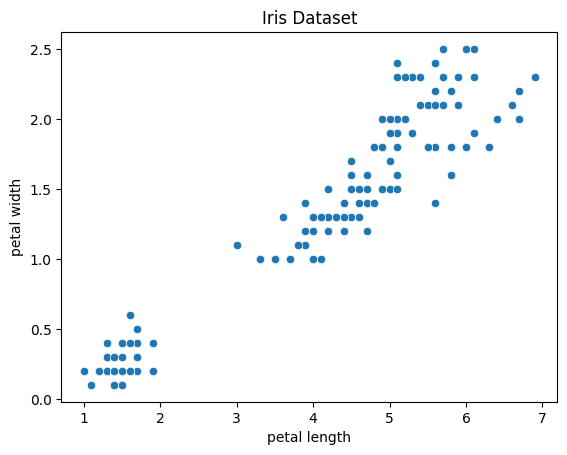

In [7]:
# an axes-level plot
ax = sb.scatterplot(data=df_iris, x="petal length", y="petal width")
# add a title
ax.set_title("Iris Dataset")

We have created an <font color="green">**Axes-level**</font> plot. You see that, instead supplying the numbers or arrays to plot directly, we can just give it the whole <font color="green">**DataFrame**</font> and tell it, which columns to use.
Instead of dissecting the data first, you have a semantic and declarative approach to specifying the plot which helps you to answer specific questions about the data more intuitively.


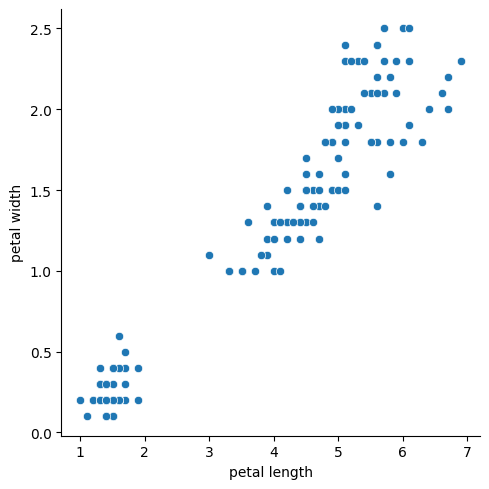

In [8]:
# a figure-level plot

sb.relplot(data=df_iris, x="petal length", y="petal width")

Obviously, both functions above produce a scatter plot. Why is that?

<font color="green">**Figure-level**</font> functions are designed for a general task, such as exploring the relationship between variables.
When creating the figure, they use the <font color="green">**Axes-level**</font> functions associated with them "under the hood". Accordingly, for each general task, there are a number of <font color="green">**Axes-level**</font> plot functions that are related to and grouped under the corresponding <font color="green">**Figure-level**</font> function.

This is how the organization looks like:

<br>
<div>
<img src="data/seaborn_function_overview_8_0.png" width="600"/>
</div>


With a <font color="green">**Figure-level**</font> plot, you can separate the data into categories further and display different subplots with a single call.


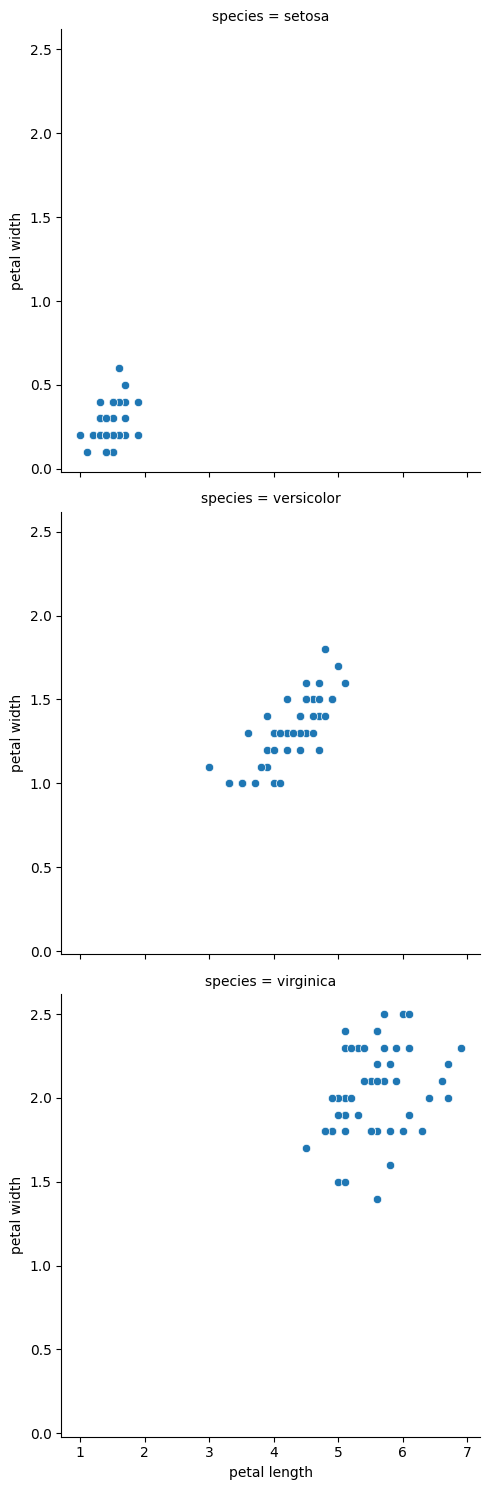

In [9]:
# separate by species

sb.relplot(data=df_iris, x="petal length", y="petal width", row="species")

## Similar functions for similar tasks

<font color="green">**Seaborn**</font> follows the idea to group similar functions that can be used for related tasks together, making it easy to switch between visualizations. That is reflected in the organization above.

It distinguishes between:

1. Relational plots - compare variables in relation to each other
2. Distributional plots - visualize statistical distributions
3. Categorical - show categorical data (e.g. our Iris species)
4. Other stuff, e.g. heatmaps

Let's see what these things can do!

### 1. Relational Plots

The main idea is to explore statistical relationships between variables. For this, the function you need is
**`seaborn.relplot()`** which is the <font color="green">**Figure-level**</font> function. <font color="green">**Axes-level**</font> functions are **`seaborn.scatterplot()`** and **`seaborn.lineplot()`**.

You can specify which kind of plot will be produced by **`relplot()`** using the `kind` argument. The default `kind` will be a scatter plot.

#### 1.1. Scatterplot

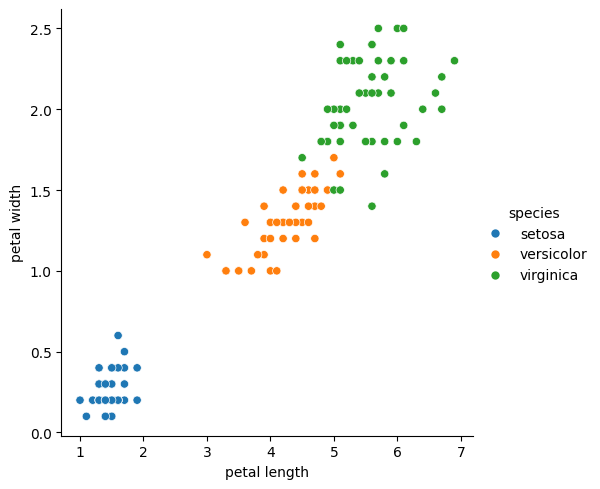

In [10]:
# do a scatterplot with relplot

fig = sb.relplot(
    data=df_iris, x="petal length", y="petal width", hue="species"
)

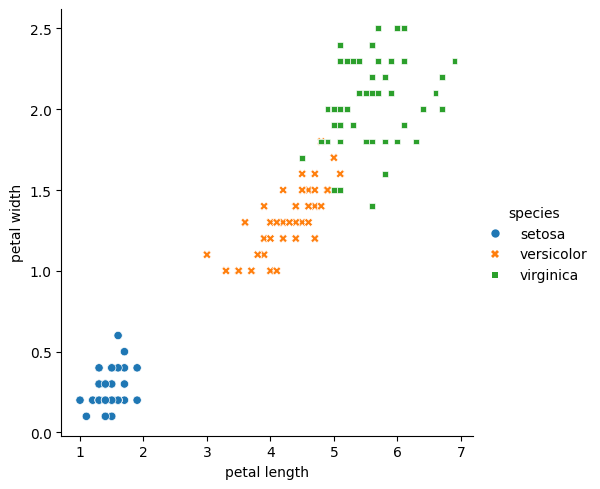

In [11]:
# add distinction with style :-)

fig = sb.relplot(
    data=df_iris, x="petal length", y="petal width", hue="species", style="species"
)

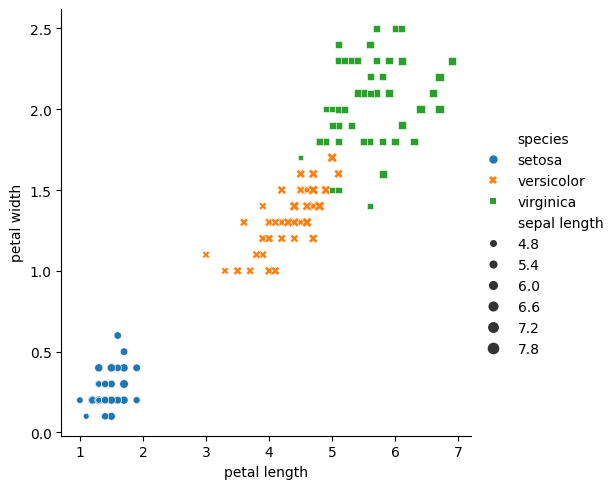

In [12]:
# add more information by adding a third variable to the mix

fig = sb.relplot(
    data=df_iris, x="petal length", y="petal width", hue="species", style="species", 
    size="sepal length"
)

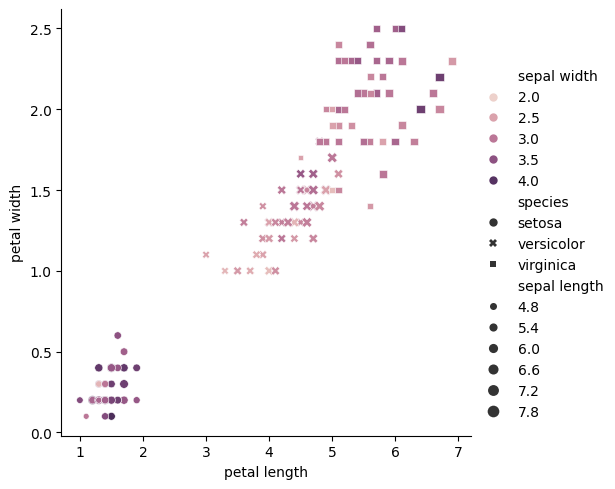

In [13]:
# what about sepal width?

fig = sb.relplot(
    data=df_iris, x="petal length", y="petal width", hue="sepal width", style="species", 
    size="sepal length"
)

You can nicely visualize the relationship of up to 5 variables in your data with a single line.
Instead of setting things like marker or color explicitly, you can use them to encode additional information.
If you use `hue` (color) to encode information, it will use a qualitative color palette, if you have categorical values or a continuous color palette for numeric data.

You can use the same semantics on the <font color="green">**Axes-level**</font> function: 

Text(0.5, 1.0, 'Iris')

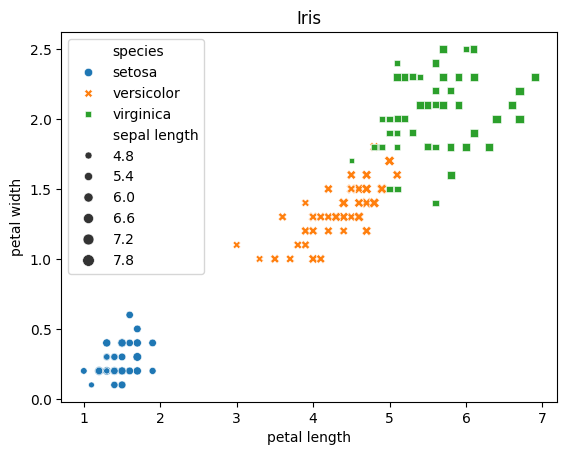

In [14]:
# do the same with scatterplot
sb.scatterplot(
    data=df_iris, x="petal length", y="petal width", 
    hue="species", style="species", size="sepal length"
).set_title("Iris")

Or on the <font color="green">**Figure-level**</font> you can use **`.relplot()`** to additionally group the data, using either `col` or `row`:

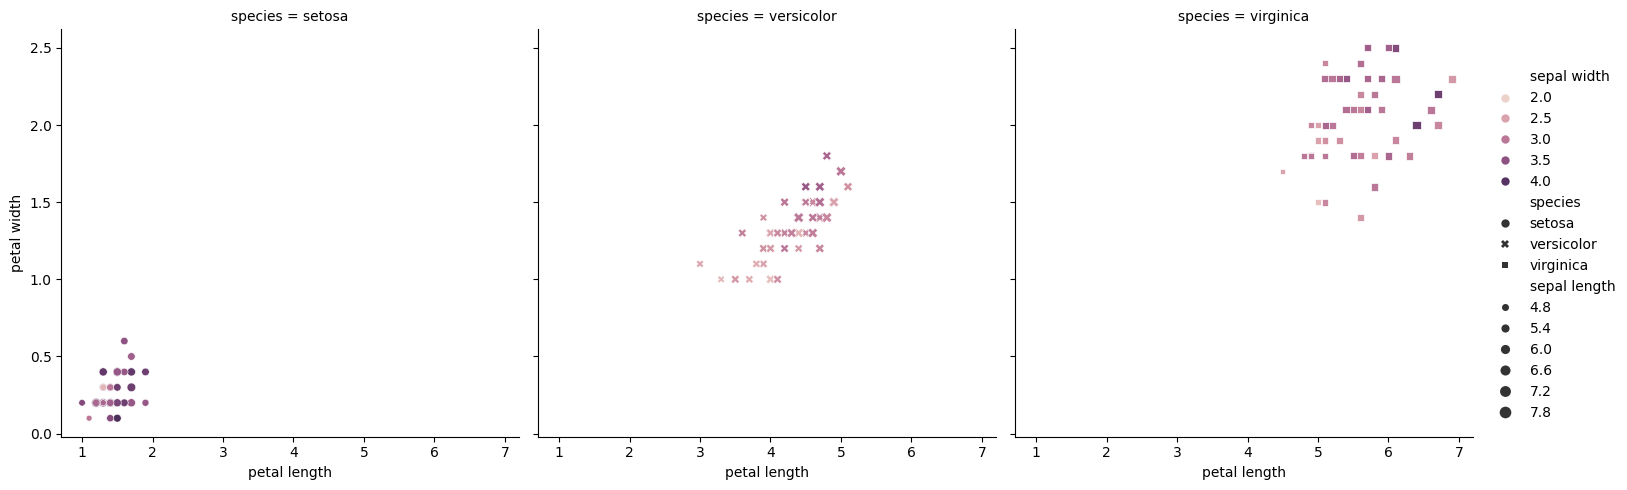

In [16]:
# col to group the data by columns

sb.relplot(
    data=df_iris, x="petal length", y="petal width", hue="sepal width", 
    style="species", size="sepal length", col="species"
)

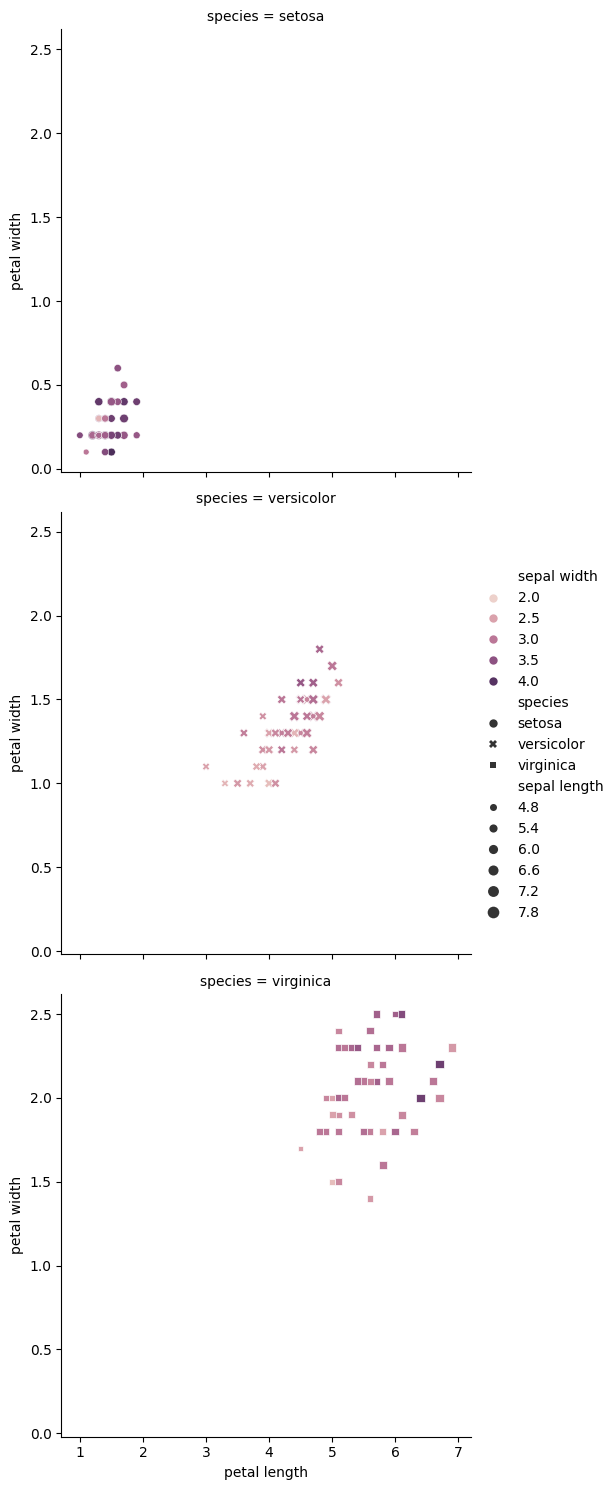

In [15]:
# row to group the data by rows

sb.relplot(
    data=df_iris, x="petal length", y="petal width", hue="sepal width", 
    style="species", size="sepal length", row="species"
)

In [17]:
df_fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


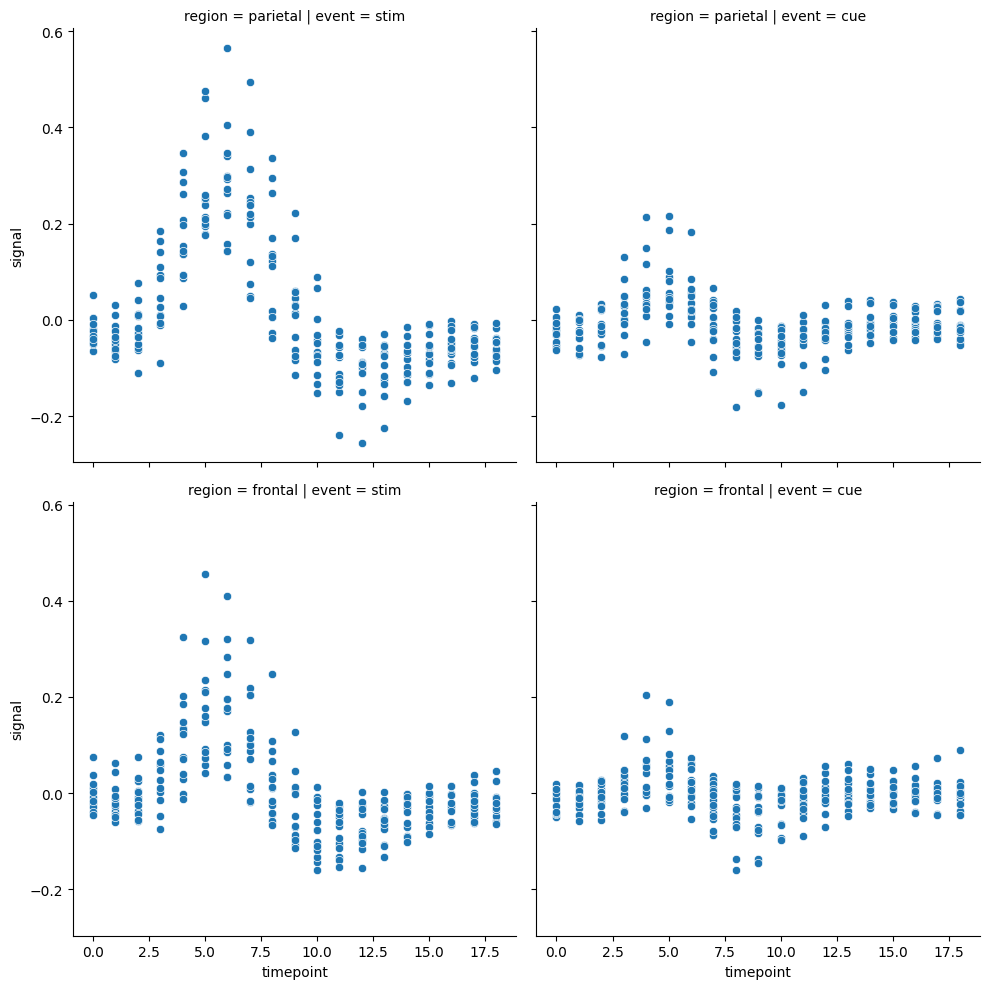

In [18]:
# row and columns to group the data by columns

sb.relplot(
    data=df_fmri, x="timepoint", y="signal",
    row="region", col="event" 
)

#### 1.2. Line plots

You can also visualize relationships with line plots, hence, **`relplot()`** can switch between scatter and line, using the `kind` parameter.

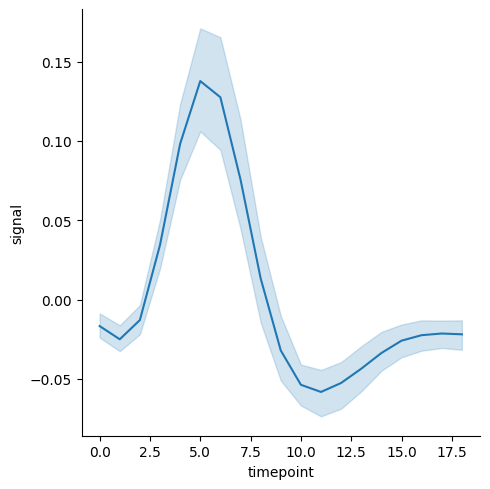

In [19]:
# do a line plot with replot, plot 95th percentile by default
sb.relplot(data=df_fmri, kind="line", x="timepoint", y="signal")

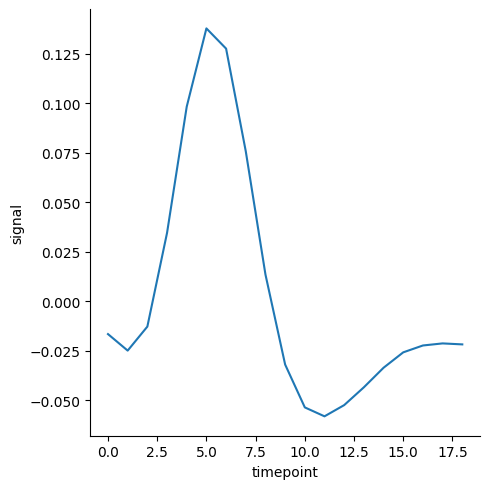

In [20]:
# turn off the error bar
sb.relplot(data=df_fmri, kind="line", x="timepoint", y="signal", errorbar=None)

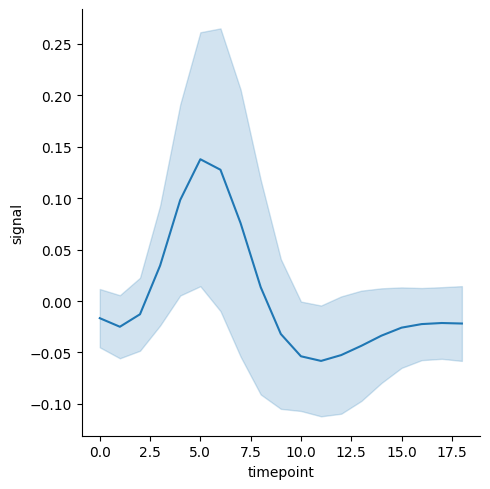

In [21]:
# plot standard deviation instead
sb.relplot(data=df_fmri, kind="line", x="timepoint", y="signal", errorbar="sd")

Since we had multiple measurements at each time point, <font color="green">**seaborn**</font> automatically aggregates
these by using a means estimator.

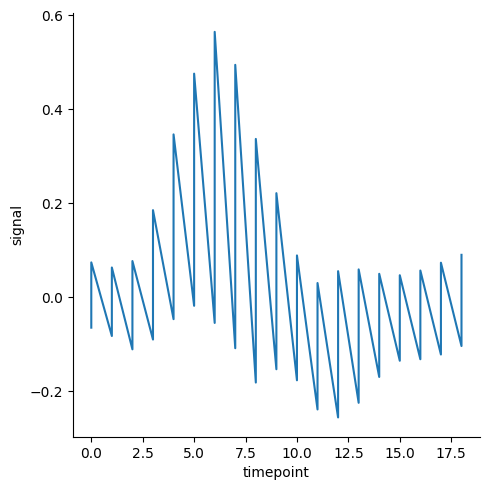

In [22]:
# turning off aggregation is weird
sb.relplot(data=df_fmri, kind="line", x="timepoint", y="signal", errorbar="sd", estimator=None)

Of course, we can use the same semantics as with scatter plots to group the data and visualize more information:

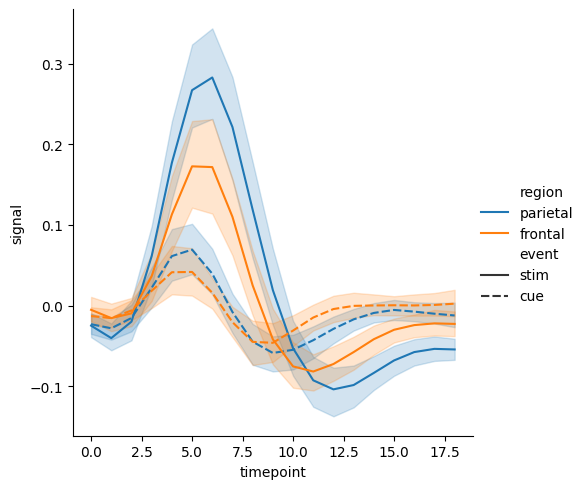

In [23]:
# group the data and add more information to the plot

sb.relplot(data=df_fmri, kind="line", x="timepoint", y="signal", 
           style="event", hue="region"
          )

We have multiple observations for each timepoint. By default, relplot then aggregates these values
You can turn that behaviour off using `estimator=None`.
It also calculates a confidence interval for the lineplot. You can control that with `errorbar`.
Same as with scatterplot(), you can encode additional information with `hue`, `style` or group
observations with `row` and `col`.

If we want to plot every subject separately, we can use `units`. 
But then, we have to turn off the mean `estimator` since there is nothing to aggregate.

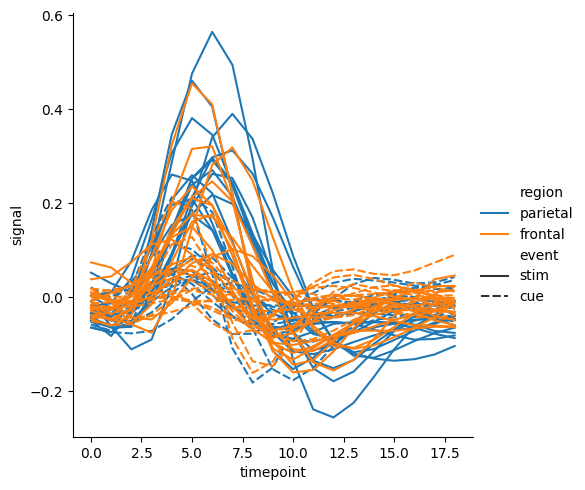

In [24]:
# cram all subjects in one

sb.relplot(
    data=df_fmri, kind="line", x="timepoint", y="signal", 
    style="event", hue="region", units="subject", estimator=None
)


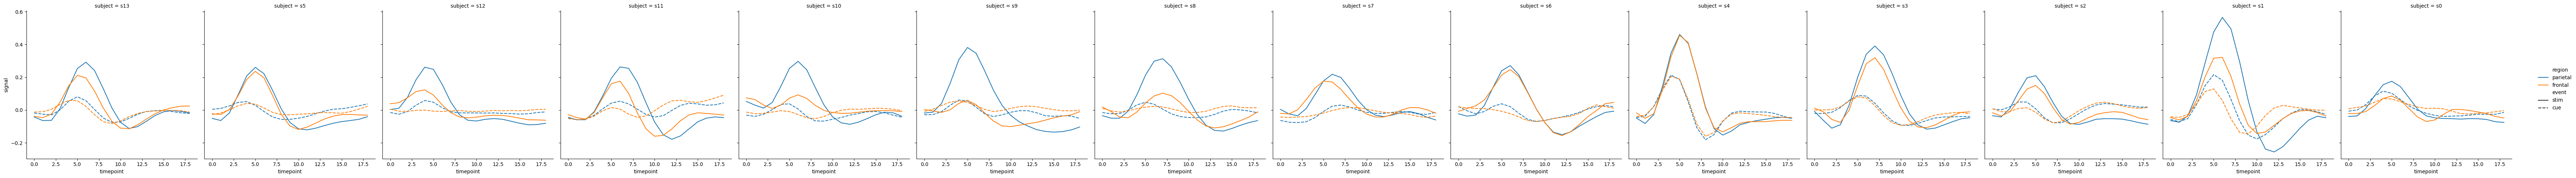

In [25]:
# cleaning up the mess ...

sb.relplot(
    data=df_fmri, kind="line", x="timepoint", y="signal", 
    style="event", hue="region", col="subject"
)

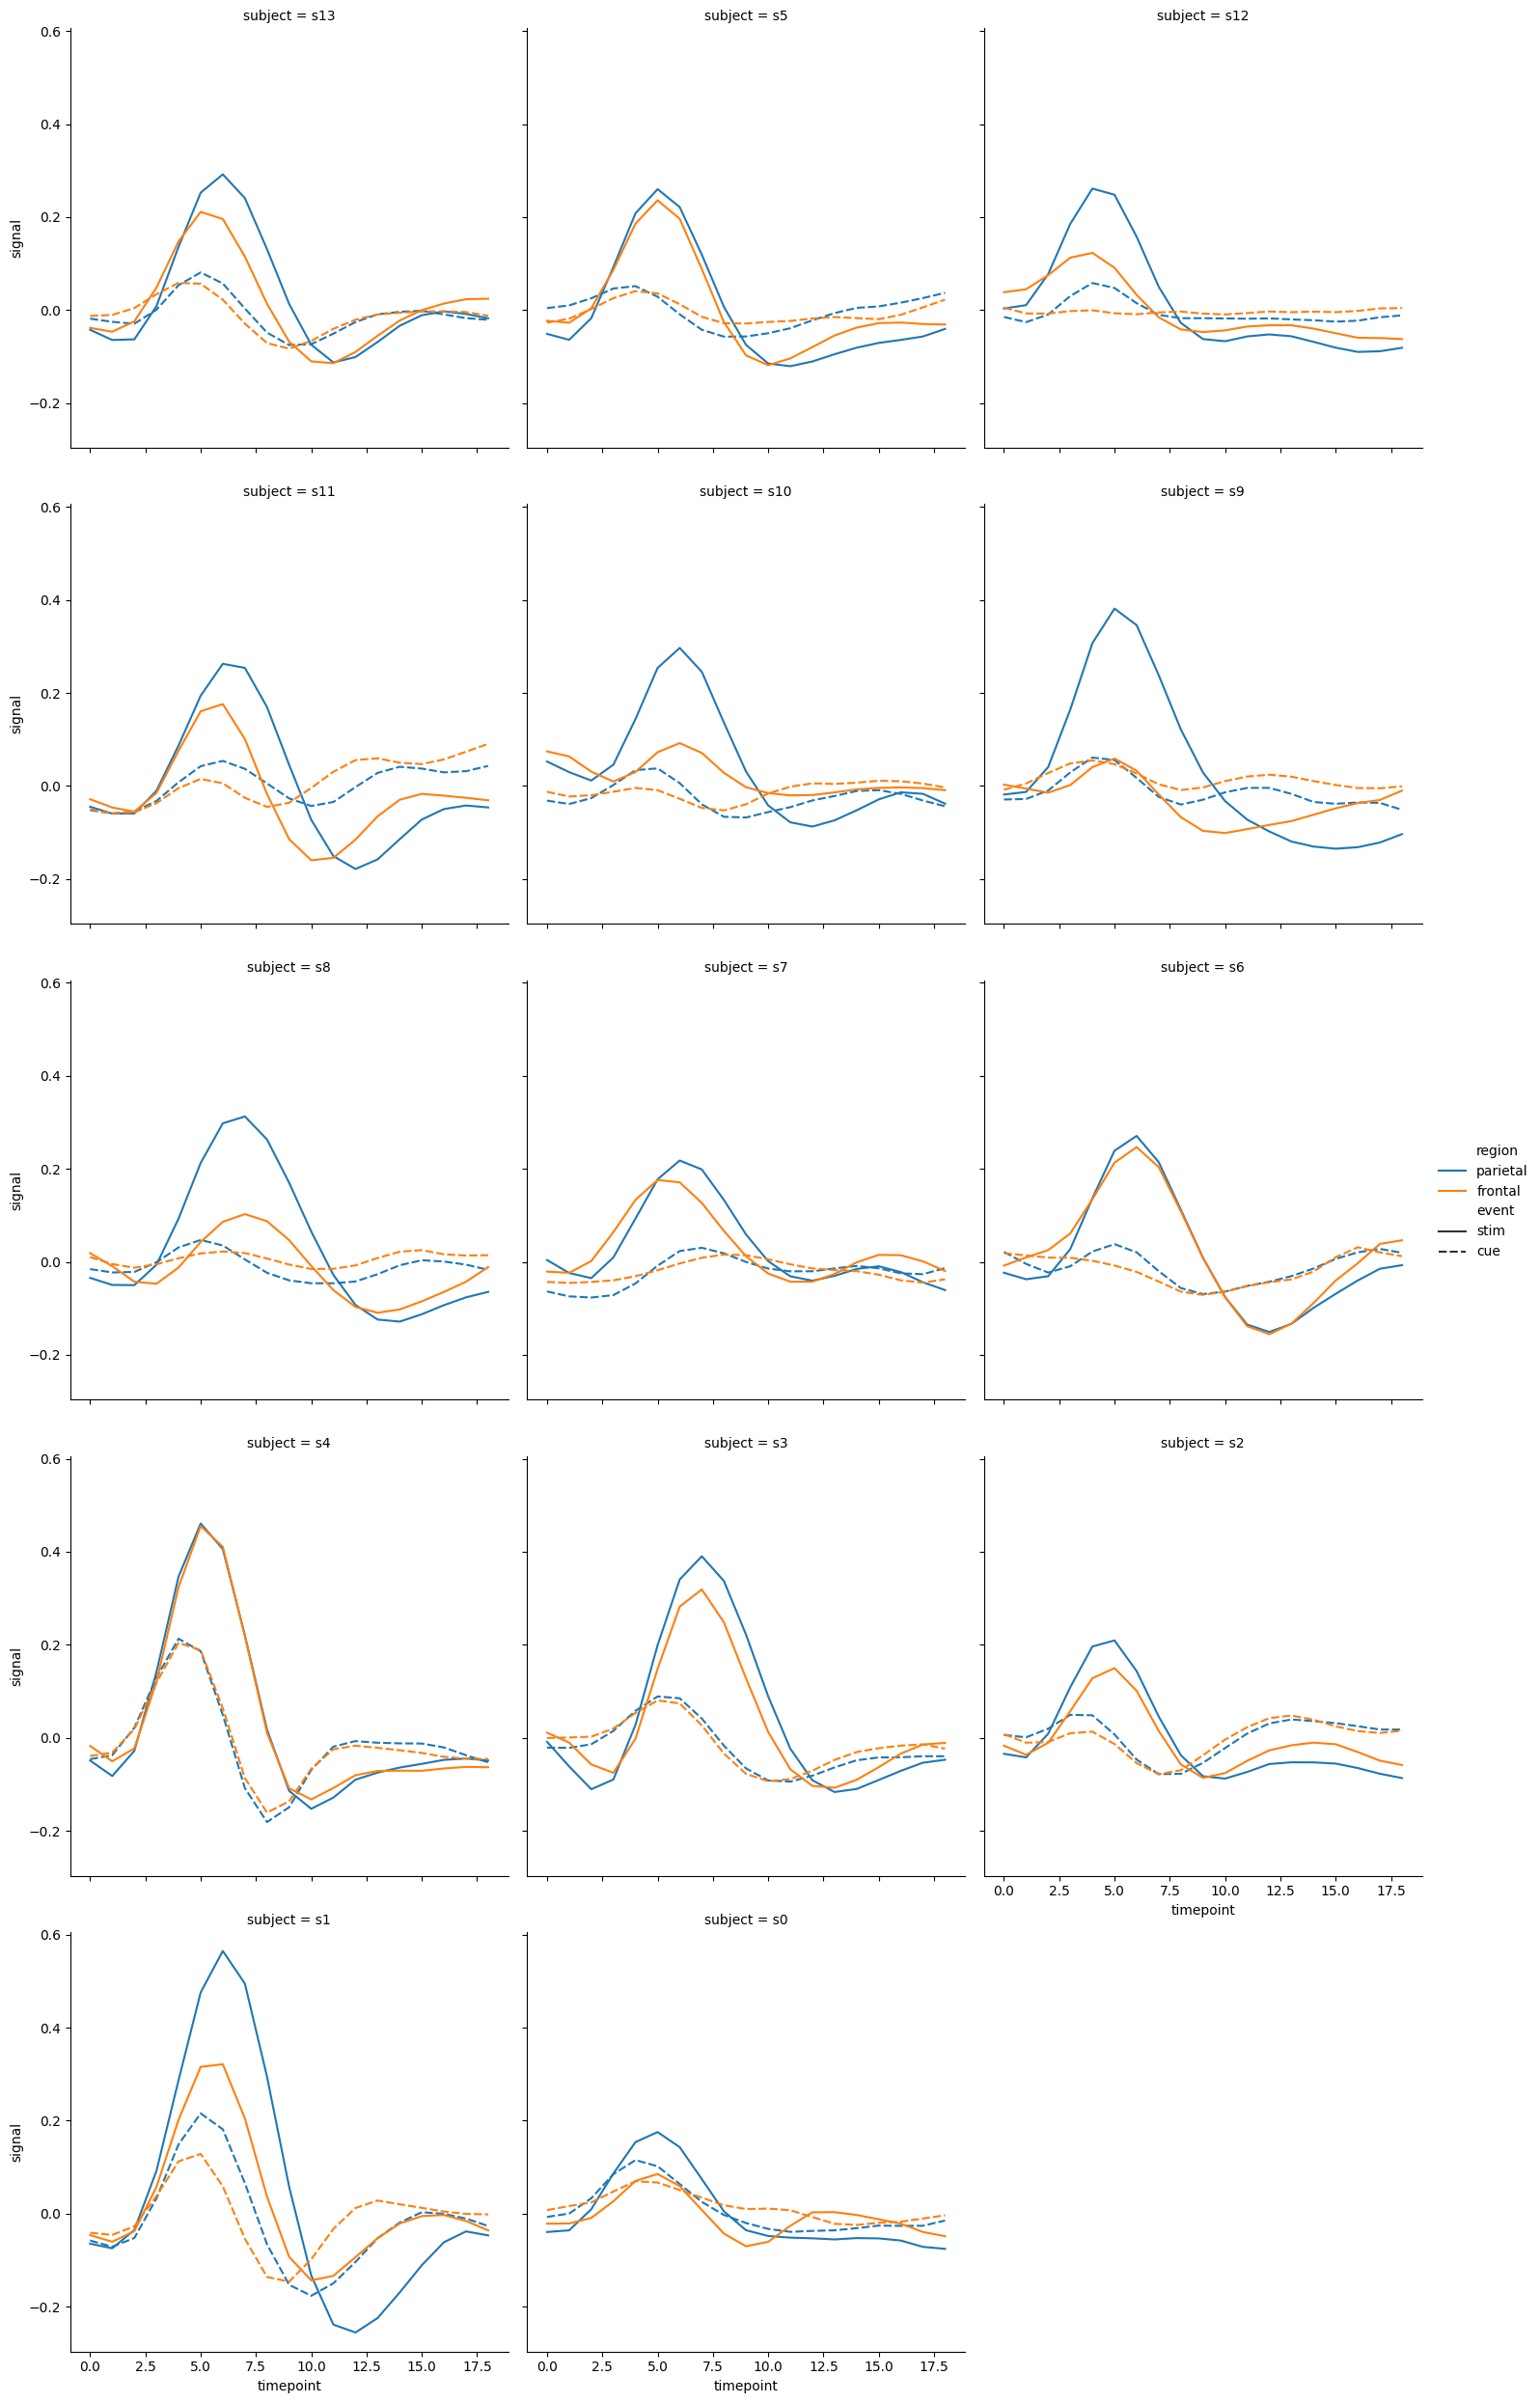

In [26]:
# 3 subjects per row to make it more readable 

sb.relplot(
    data=df_fmri, kind="line", x="timepoint", y="signal", 
    style="event", hue="region", col="subject", col_wrap=3
)

In [27]:
df_montys

,First Name,Name,Year,Score,Movies,Director,Writer,Awards,Birthday,Country
0,John,Cleese,1939,9.3,183,3.0,77,12,27-10-1939,England
1,Graham,Chapman,1941,8.8,29,0.0,53,1,08-01-1941,England
2,Eric,Idle,1943,9.0,87,11.0,45,2,29-03-1941,England
3,Terry,Gilliam,1940,9.2,33,19.0,31,29,22-11-1941,USA
4,Michael,Palin,1943,9.2,77,0.0,66,9,05-05-1941,England
5,Terry,Jones,1942,9.0,59,19.0,57,3,01-02-1941,Wales


### 2. Distributional plots

Sometimes, we want to visualize distributions. Naturally we think of histograms or probability functions.
How does a distribution look? What is its range? Are there outliers? is the data unimodal? Bimodal? Normal?

The <font color="green">**Figure-level**</font> function here is **`displot()`**.

#### 2.1. Histograms

The underlying function would be, no surprise here, **`histplot()`**.

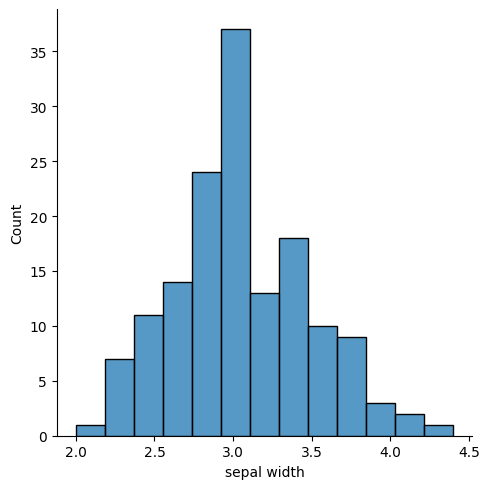

In [28]:
# calculate a histogram

sb.displot(df_iris, x="sepal width")

If you make a histogram, you want to control the bins. You can control that with `bins` or `binwidth`.

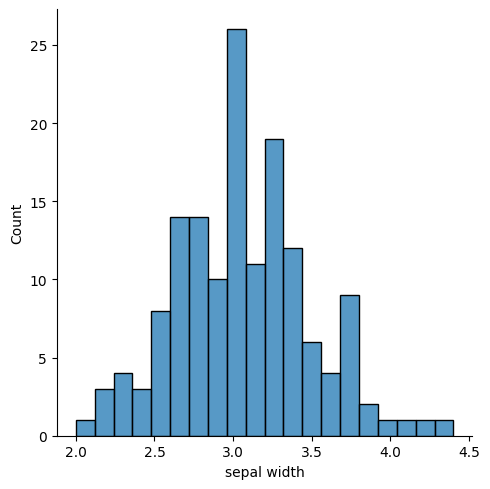

In [29]:
# adjust the bins

sb.displot(df_iris, x="sepal width", bins=20)

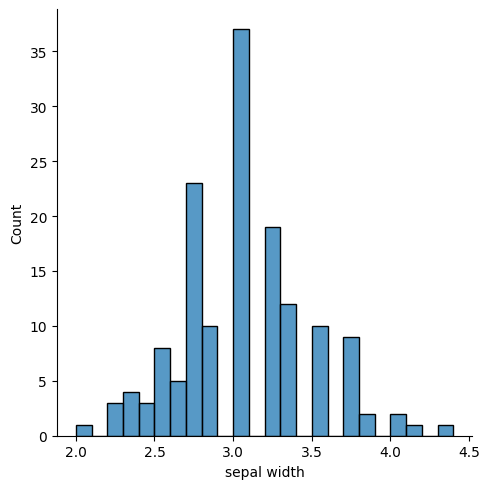

In [32]:
# adjust the bin width

sb.displot(df_iris, x="sepal width", binwidth=0.1)

You can again condition the display on other variables, as we did with the relational plots above.
Setting `hue` on a categorical variable will group the data according to its values and draw separate histograms layered behind each other. You can change that behaviour by using `multiple` and do stacked or dodged histograms. 

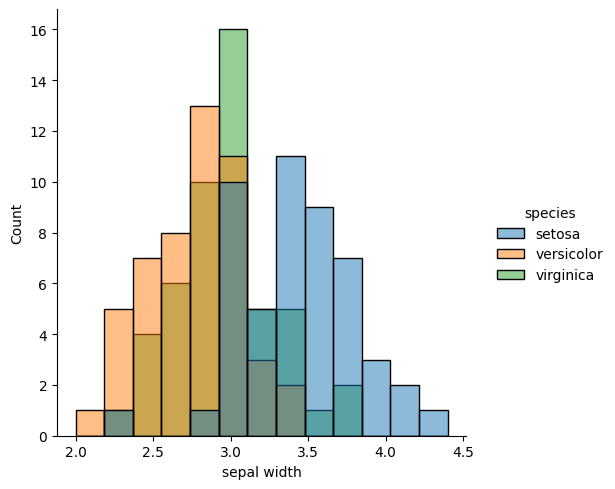

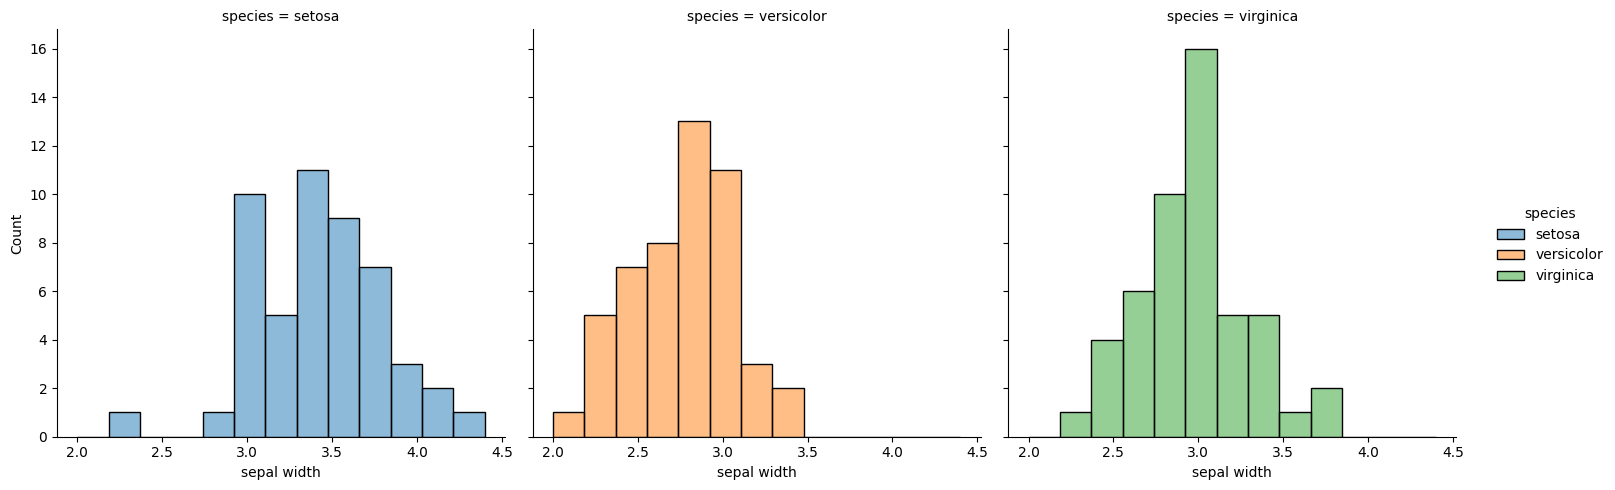

In [33]:
# let's add some color
sb.displot(df_iris, x="sepal width", hue="species")  # three separate histograms overlayed
sb.displot(df_iris, x="sepal width", hue="species", col="species")  # let's plot them separately

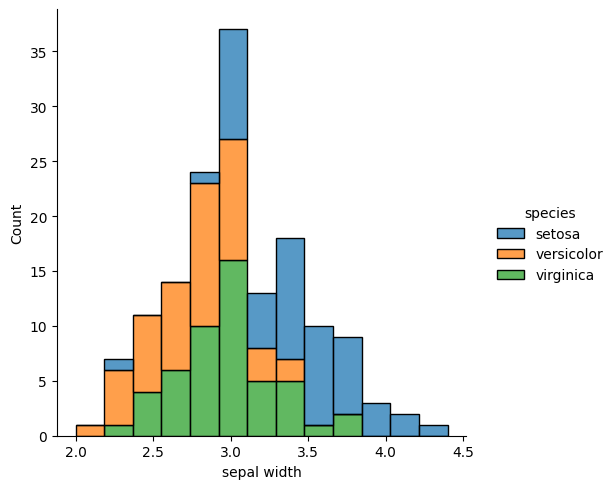

In [34]:
# instead, we can stack them ...

sb.displot(df_iris, x="sepal width", hue="species", multiple="stack")  # a stacked histogram

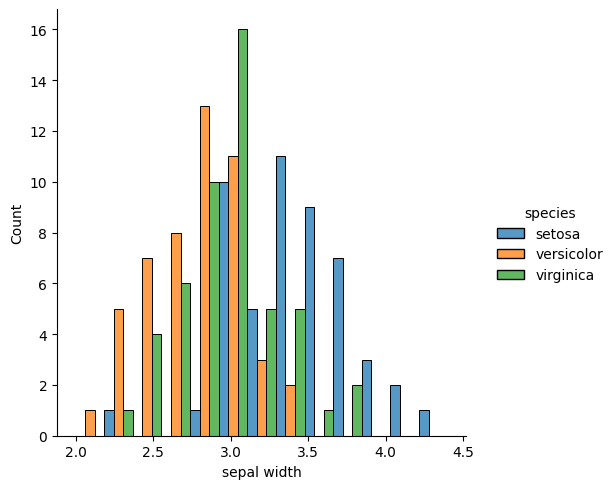

In [35]:
# nah, that's not it ... dodge them!

sb.displot(df_iris, x="sepal width", hue="species", multiple="dodge")  # a grouped histogram

Facetting the plot with `row` and `col` works as before.

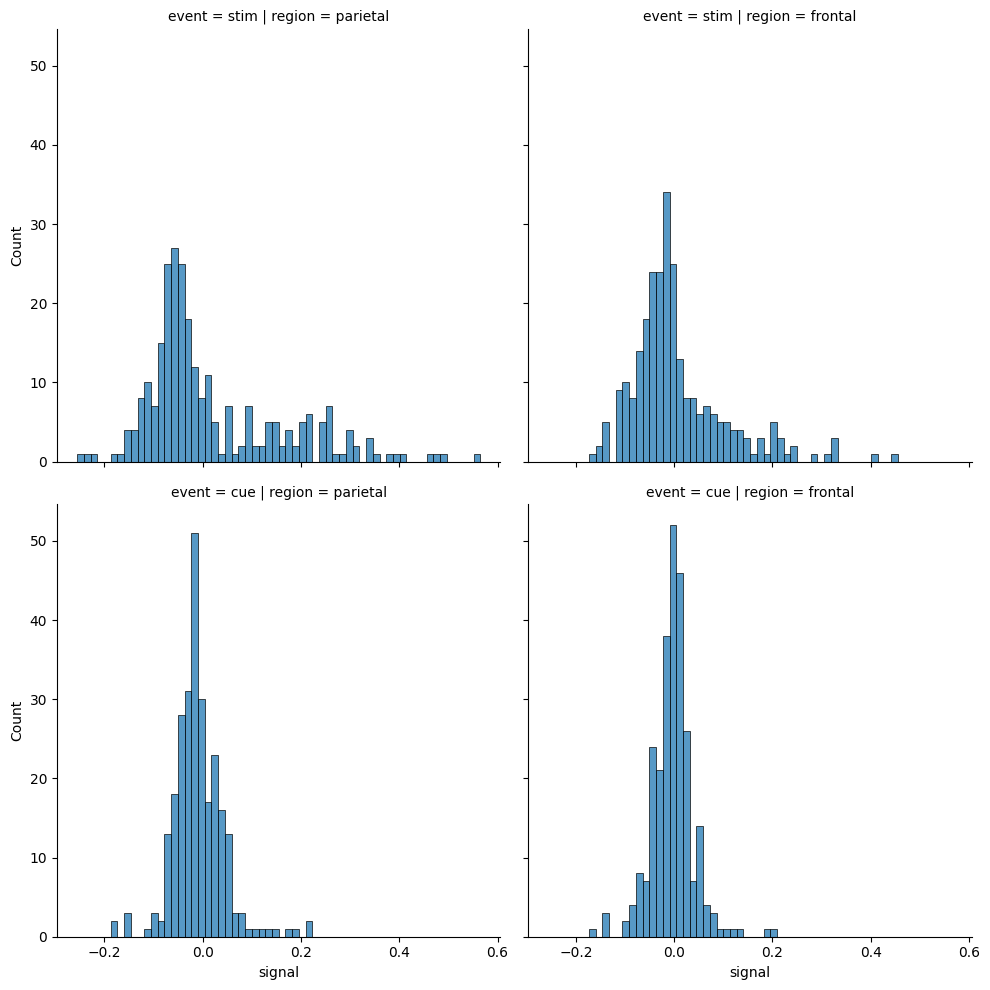

In [36]:
# Again, you can use col and row ... 

sb.displot(df_fmri, x="signal", row="event", col="region")

As we have seen before with the aggregation, <font color="green">**seaborn**</font> does not only do plotting, there is also some handy calculation going on behind the scenes. For histograms, you can normalize the plots using `stat` which tells the function what sort of nomralization you want. By default however, this will apply the normalization the whole data set. If we want to scale the data in each category differently, we need to use `common_norm=False`.

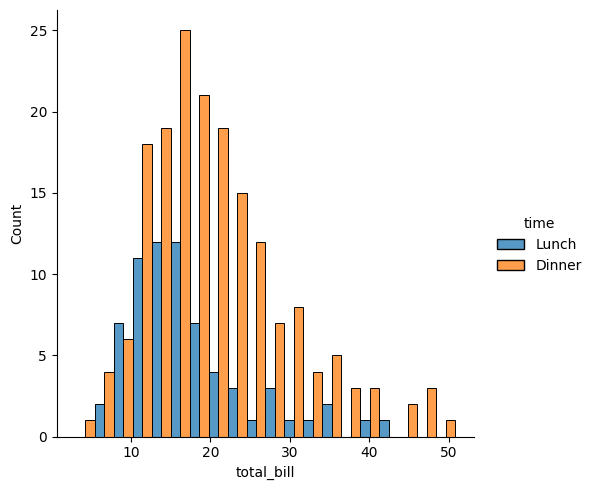

In [37]:
# no normalization

sb.displot(
    df_tips, x="total_bill", bins=20, hue="time", multiple="dodge"
)

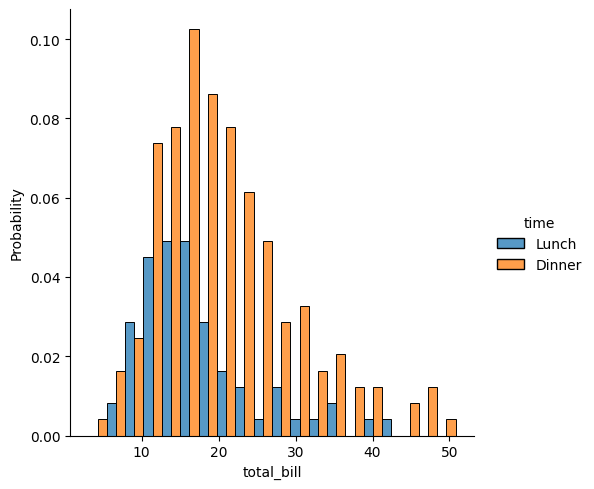

In [39]:
# normalize total bill

sb.displot(
    df_tips, x="total_bill", bins=20, hue="time", 
    multiple="dodge", stat="probability"
)

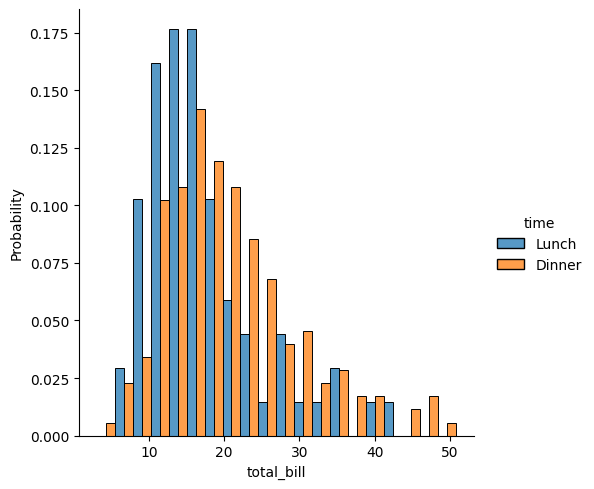

In [40]:
# normalize by category
sb.displot(
    df_tips, x="total_bill", bins=20, hue="time", 
    multiple="dodge", stat="probability", common_norm=False
)

#### 2.2 Kernel Density Estimator

When you want to plot a probability density function instead, you need a KDE. Again, we can do this with the <font color="green">**Figure-level**</font> function **`displot()`** using `kind="kde"`, which calls the underlying **`kdeplot()`**.

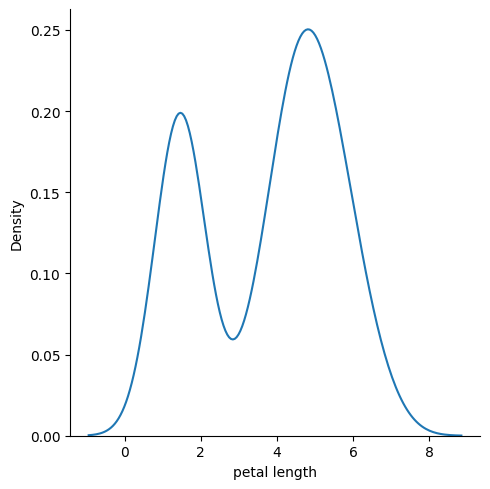

In [43]:
# what is the distribution of the petal length?

sb.displot(df_iris, x="petal length", kind="kde")

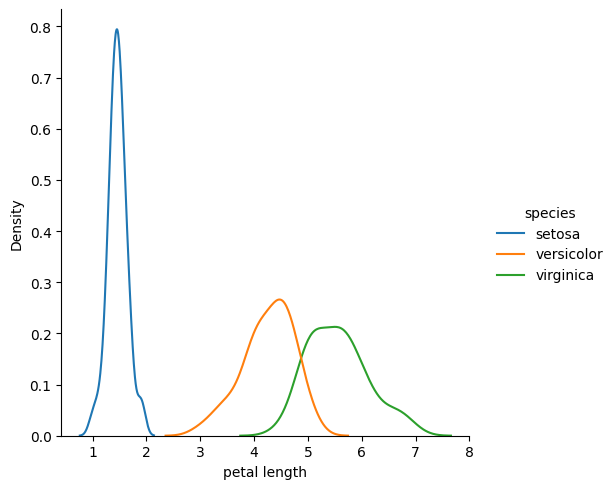

In [44]:
# let's condition on species ...

sb.displot(df_iris, x="petal length", kind="kde", hue="species")

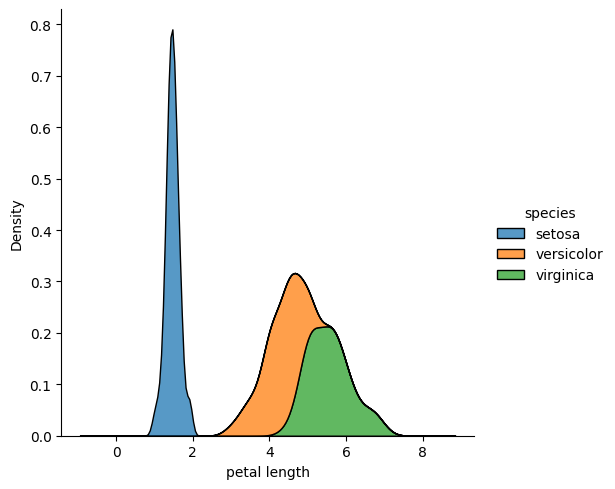

In [45]:
# instead of layering, we can stack this, just like historams

sb.displot(df_iris, x="petal length", kind="kde", hue="species", multiple="stack")

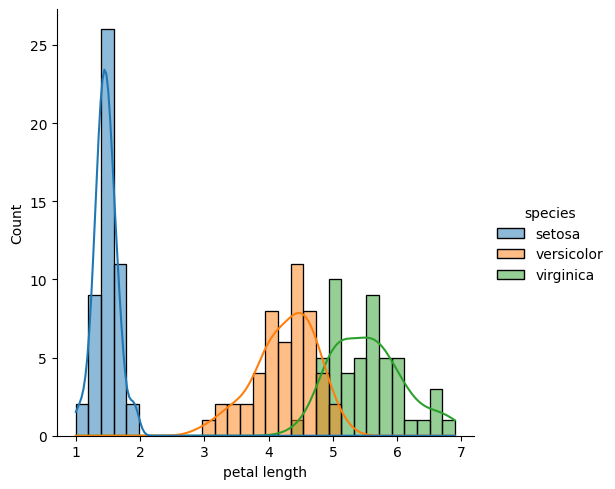

In [46]:
# combine histograms and kde

sb.displot(df_iris, x="petal length", hue="species", bins=30, kde=True)

#### 2.3. Cumulative Density

If you need to, you can also do a cumulative density function using `kind="ecdf"` or **`ecdf()`**.

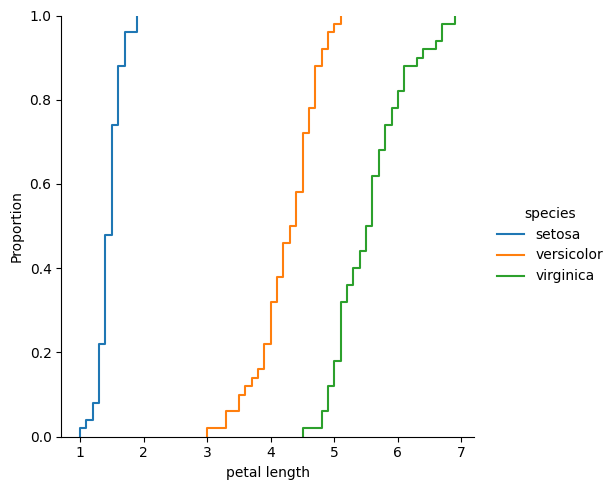

In [47]:
# do a cumulative density function

sb.displot(df_iris, x="petal length", hue="species", kind="ecdf")

#### 2.4. Rug plot

This is a special kind of plot in <font color="green">**seaborn**</font>, which gives you a "rug" of small ticks at the bottom that represent your data points. The <font color="green">**Axes-level**</font> function is called **`rugplot()`**.

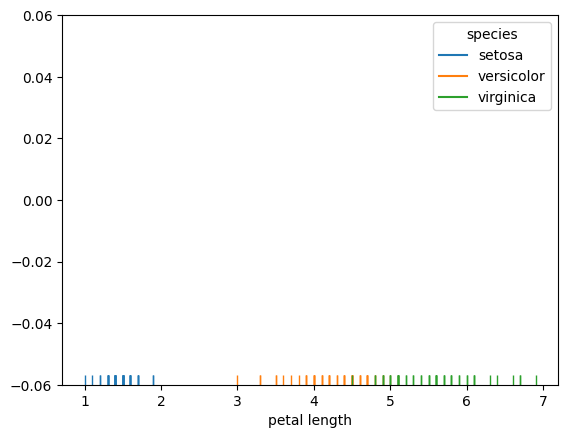

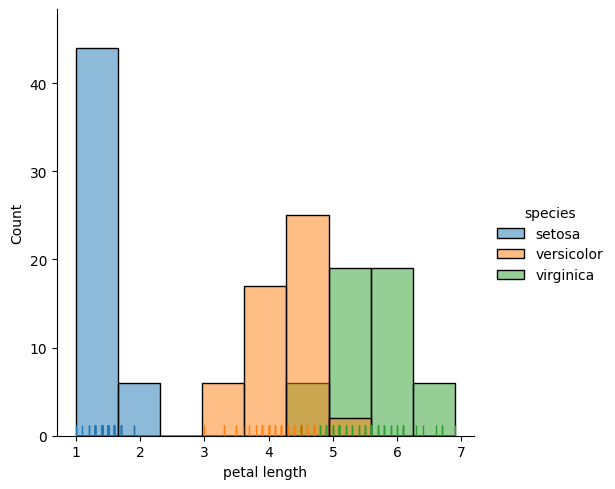

In [48]:
# rugs
sb.rugplot(df_iris, x="petal length", hue="species")  # a rug plot on an Axes level

sb.displot(df_iris, x="petal length", hue="species", rug=True)  # rug plot combined on Figure level

### 3. Categorical plots

Here you want to explore the relationships between categories (as oposed to numerical data with relational plots).
Again, there is a major <font color="green">**Figure-level**</font> function, which is called **`catplot()`**. The default behaviour is to create a scatter/strip plot.
Here you'll find categorical strip plots, box plots, violin plots, swarm plots and much more.

#### 3.1 Strip/Swarm plots

If you want to visualize your data points within a category, you can use scatter/strip plots or swarm plots. The former is the default behaviour and the underlying <font color="green">**Axes-level**</font> function is **`stripplot()`**. The latter is basically the same but **`swarmplot()`** try to optimize the position of data points in order to unclutter them. 
Alternatively, you can use the `jitter` parameter with **`stripplot()`** to tweak the data point position .\
You can specify the plot type again with `kind` and the usual semantics apply.


In [49]:
df_iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


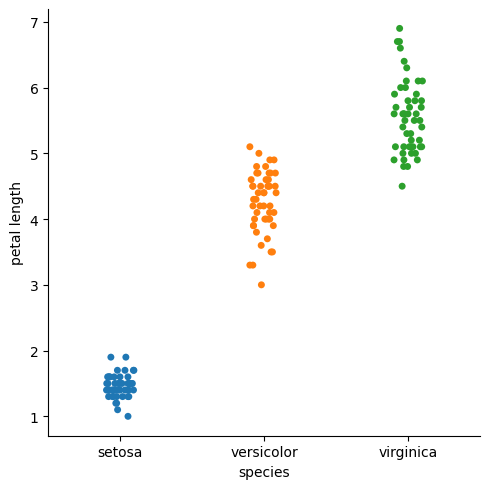

In [50]:
# categorical scatterplot

sb.catplot(df_iris, x="species", y="petal length", hue="species")

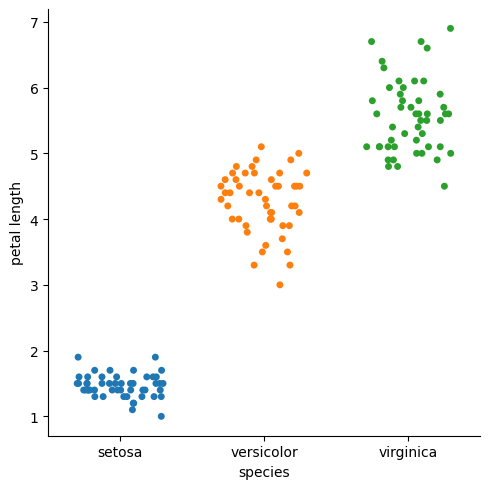

In [51]:
# what if they are too clumped?

sb.catplot(df_iris, x="species", y="petal length", hue="species", jitter=.3)

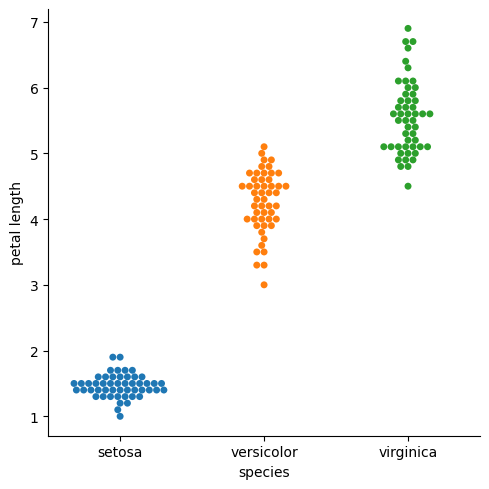

In [52]:
# or if that's not pleasing, try swarmplots

sb.catplot(df_iris, x="species", y="petal length", hue="species", kind="swarm")

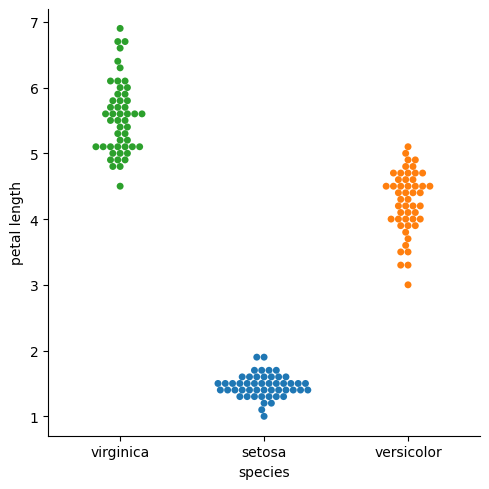

In [53]:
# change the order of the categories

sb.catplot(
    df_iris, x="species", y="petal length", hue="species", kind="swarm", 
    order=["virginica", "setosa", "versicolor"]
)

<Axes: xlabel='petal length', ylabel='species'>

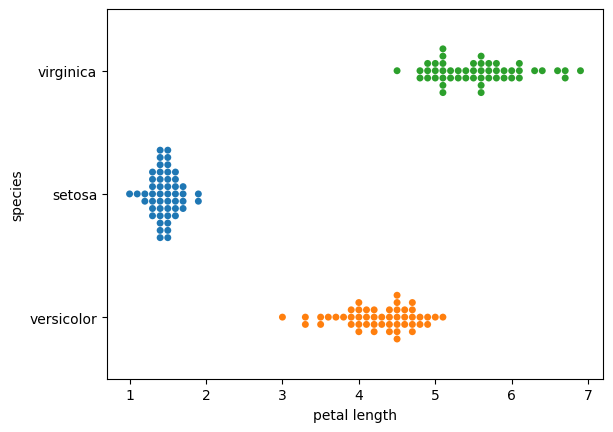

In [54]:
# flip the axis

sb.swarmplot(
    df_iris, y="species", x="petal length", hue="species", 
    order=["virginica", "setosa", "versicolor"]
)

#### 3.2 Box/Violin

When you want to compare distributions between categories, we can again use box plots (`kind=box`) or violin plots (`kind=violin`). Again we can use the color to add another dimension to the plot. Using `inner`, you can adjust the inside of violin plots and you can use `split=True` to fuse two separate violins into a single one.

In [55]:
df_fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


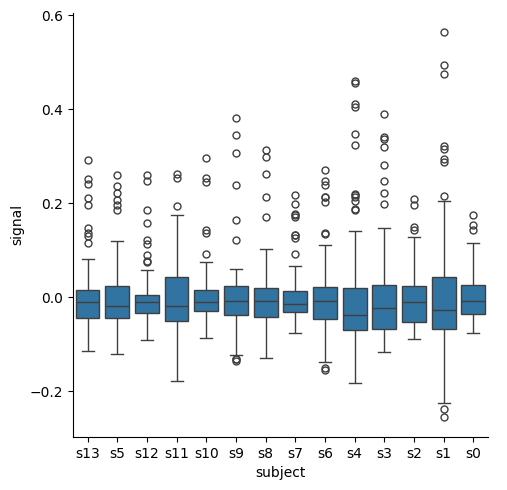

In [56]:
# a box plot of day versus total_bill

sb.catplot(df_fmri, y="signal", x="subject", kind="box")

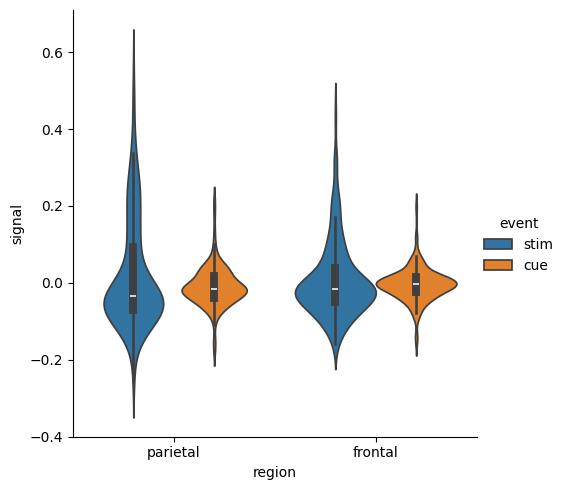

In [57]:
# let's try a more curvy look

sb.catplot(df_fmri, y="signal", x="region", hue="event", kind="violin")

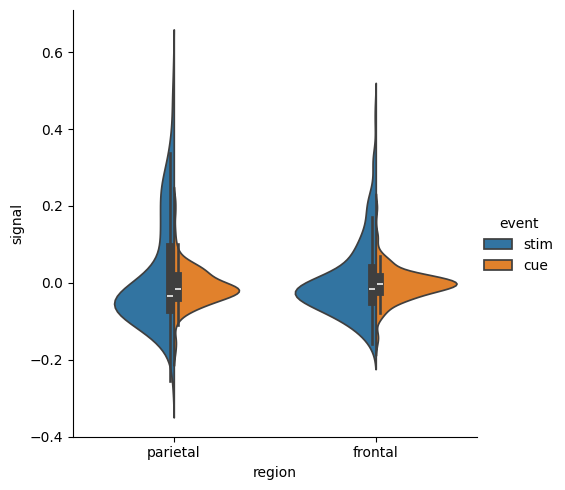

In [58]:
# non-symmetric is non-redundant

sb.catplot(df_fmri, y="signal", x="region", hue="event", kind="violin", split=True)

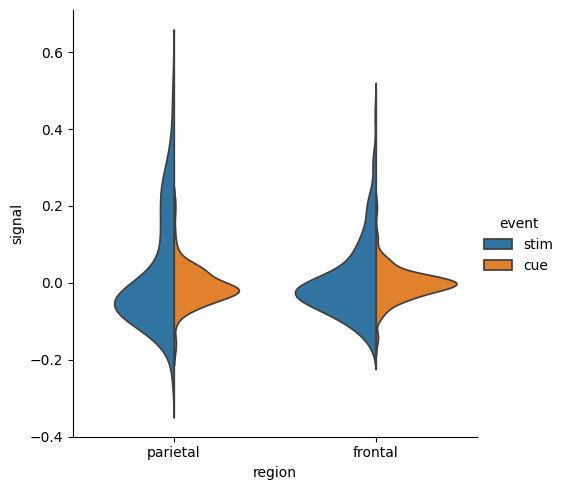

In [59]:
# if you don't like the boxplots drawn inside ... 

sb.catplot(df_fmri, y="signal", x="region", hue="event", kind="violin", split=True, inner=None)

<Axes: xlabel='species', ylabel='sepal length'>

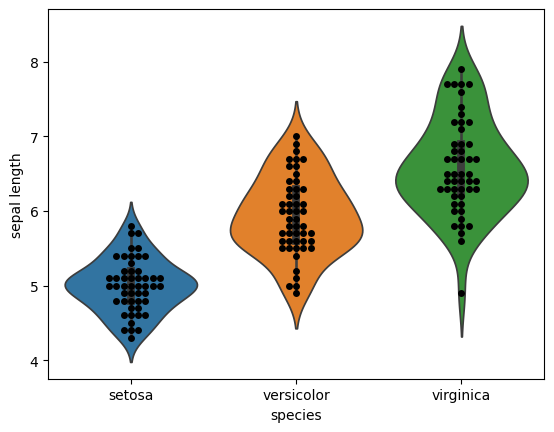

In [60]:
# combine swarm and violin

sb.swarmplot(df_iris, y="sepal length", x="species", color="k")
sb.violinplot(df_iris, y="sepal length", x="species", hue="species")

What happened?

<details>
    <summary><font color="orange"><b>Click me!</b></font></summary>
Apparently, you can also combine plots by calling the <font color="green">**Axes-level**</font> functions one after another. Since these are essentially <font color="green">**matplotlib**</font> Figures again, the same "layering" approach to plots works here as well (with <font color="green">**Axes-level**</font> figures).
    </ul>
</details>



#### 3.3 Bars

This is just the same as we had in <font color="green">**matplotlib**</font>. If you want to do bar plots here, use `kind=bar` or **`barplot()`**.

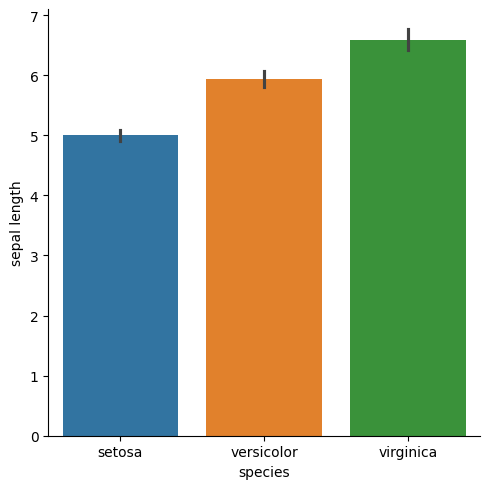

In [61]:
# do a bar plot

sb.catplot(df_iris, y="sepal length", x="species", hue="species", kind="bar")

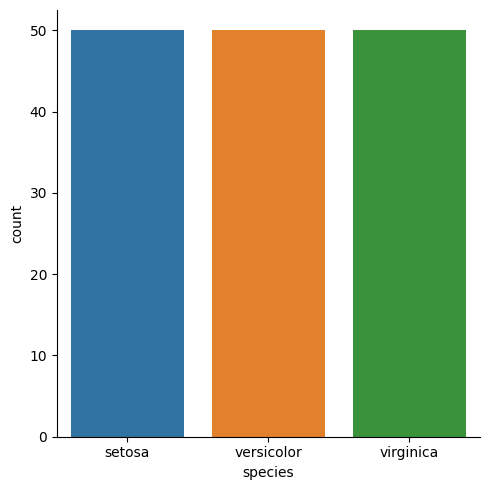

In [62]:
# if you want to know, how many data points, use count plot

sb.catplot(df_iris, x="species", hue="species", kind="count")

#### 3.4 Point plots

Instead of showing bars, you can show just the height as a point with confidence intervals. Connect the dots with a line. You get that with `kind=point` or **`pointplot()`**.

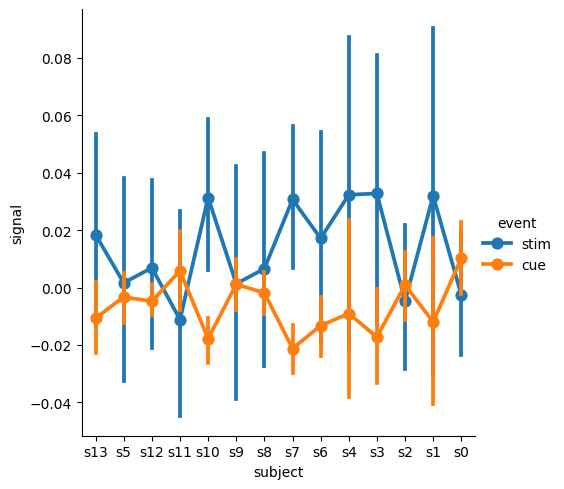

In [63]:
# instead of a bar plot, you can just show the bar height as points

sb.catplot(df_fmri, x="subject", y="signal", hue="event", kind="point")

## 4. Matrix plots

Finally, Heatmaps!

,sepal length,sepal width,petal length,petal width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<Axes: ylabel='species'>

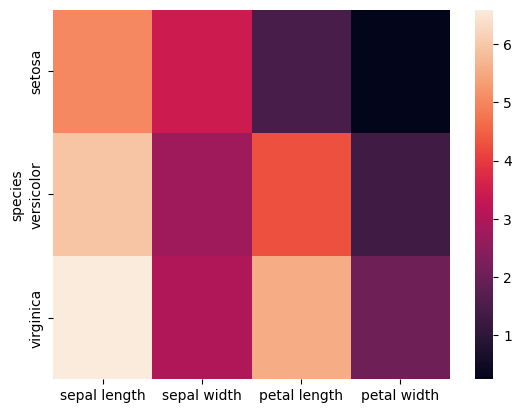

In [65]:
# a heatmap
display(df_iris_means)
sb.heatmap(df_iris_means)

<Axes: ylabel='species'>

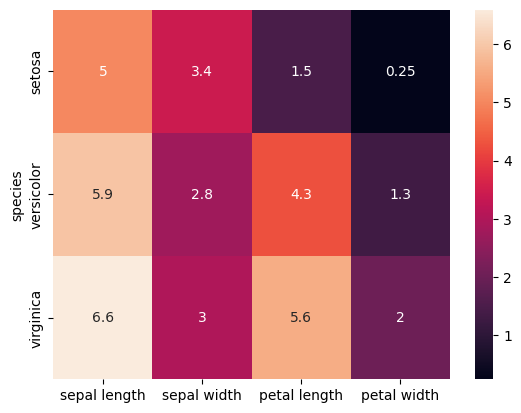

In [66]:
# we can also indicate the values by placing annotations

sb.heatmap(df_iris_means, annot=True)

<Axes: ylabel='species'>

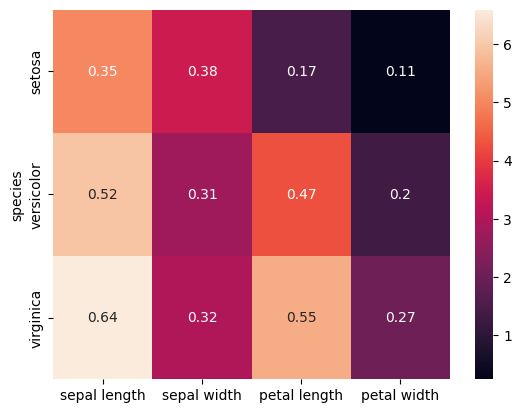

In [67]:
# we could also draw annotations from another dataframe,e.g. displaying the standard deviations

sb.heatmap(df_iris_means, annot=df_iris_std)

<Axes: ylabel='species'>

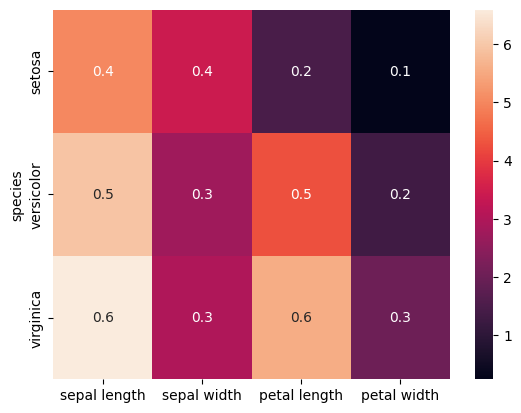

In [68]:
# ... we could format the numbers

sb.heatmap(df_iris_means, annot=df_iris_std, fmt="1.1f")

<Axes: ylabel='species'>

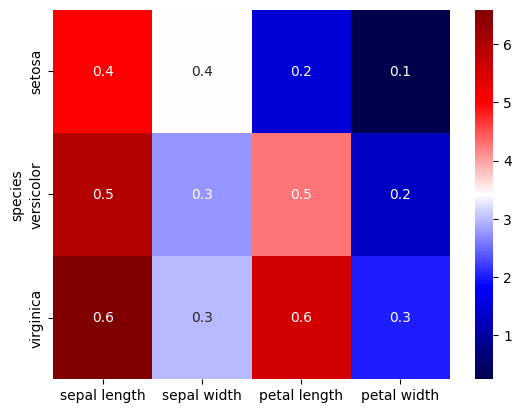

In [69]:
# ... change the color map

sb.heatmap(df_iris_means, annot=df_iris_std, fmt="1.1f", cmap="seismic")

<Axes: ylabel='species'>

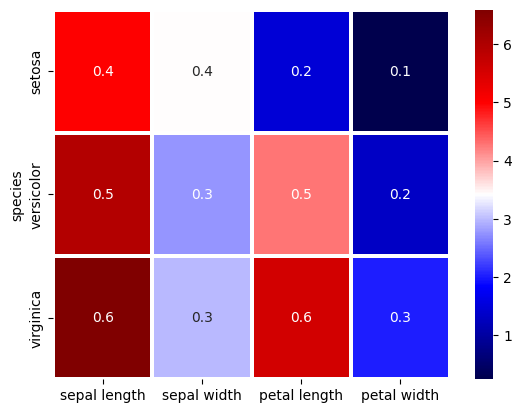

In [70]:
# ... display a line

sb.heatmap(df_iris_means, annot=df_iris_std, fmt="1.1f", cmap="seismic", linewidth=1.5)

<Axes: ylabel='species'>

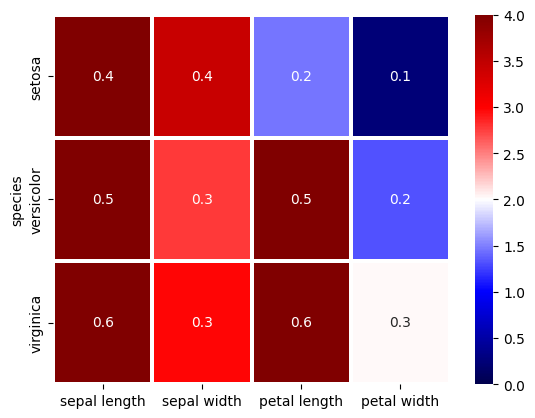

In [71]:
# ...or set limits to the displayed values

sb.heatmap(df_iris_means, annot=df_iris_std, fmt="1.1f", cmap="seismic", linewidth=1.5, 
           vmin=0, vmax=4
          )

The heatmap function takes a lot of parameters that correspond to the underlying <font color="green">**matplotlib**</font> heatmap function: `vmin` and `vmax` for setting lower and upper bounds for the values or `cmap` to set a color map. We've seen that we can easily add annotations to the cells using `annot`, format the displayed text with `fmt` and plot lines between the cells.

# Multiple views in a single figure

There are two other functions that don't fit into this categorization of functions, because they combine multiple kinds of plots from different modules, to combine different aspects of your data into a single figure:

- **`jointplot()`** plots the relationship and joint distribution of the data
- **`pairplot()`** plots all pairwise relationships between all variables in your data 

You can still use the `hue` semantics to categorize the data and even switch the type of the plot using kind.

In [72]:
df_iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


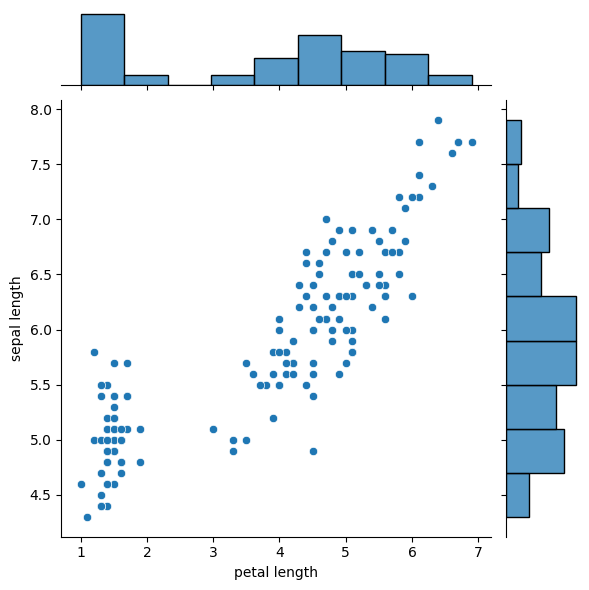

In [73]:
# a joint plot with marginal distributions

sb.jointplot(df_iris, x="petal length", y="sepal length")

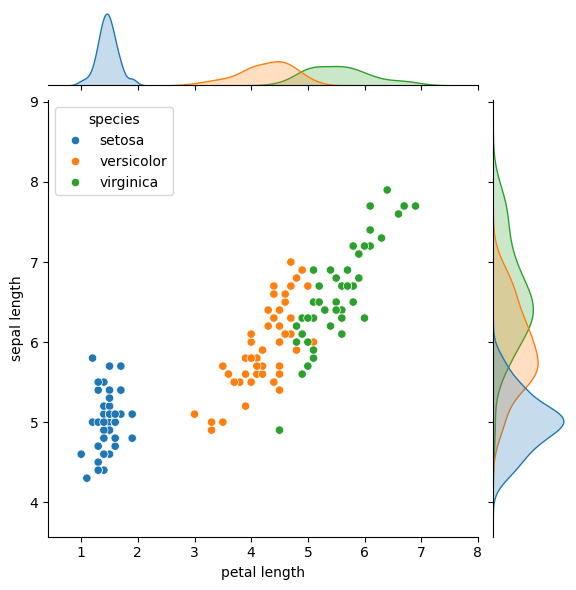

In [74]:
# let's stratify by species

sb.jointplot(df_iris, x="petal length", y="sepal length", hue="species")

Instead of showing every data point in a main plot with marginal distributions, pairplot visualizes al combinations separately:

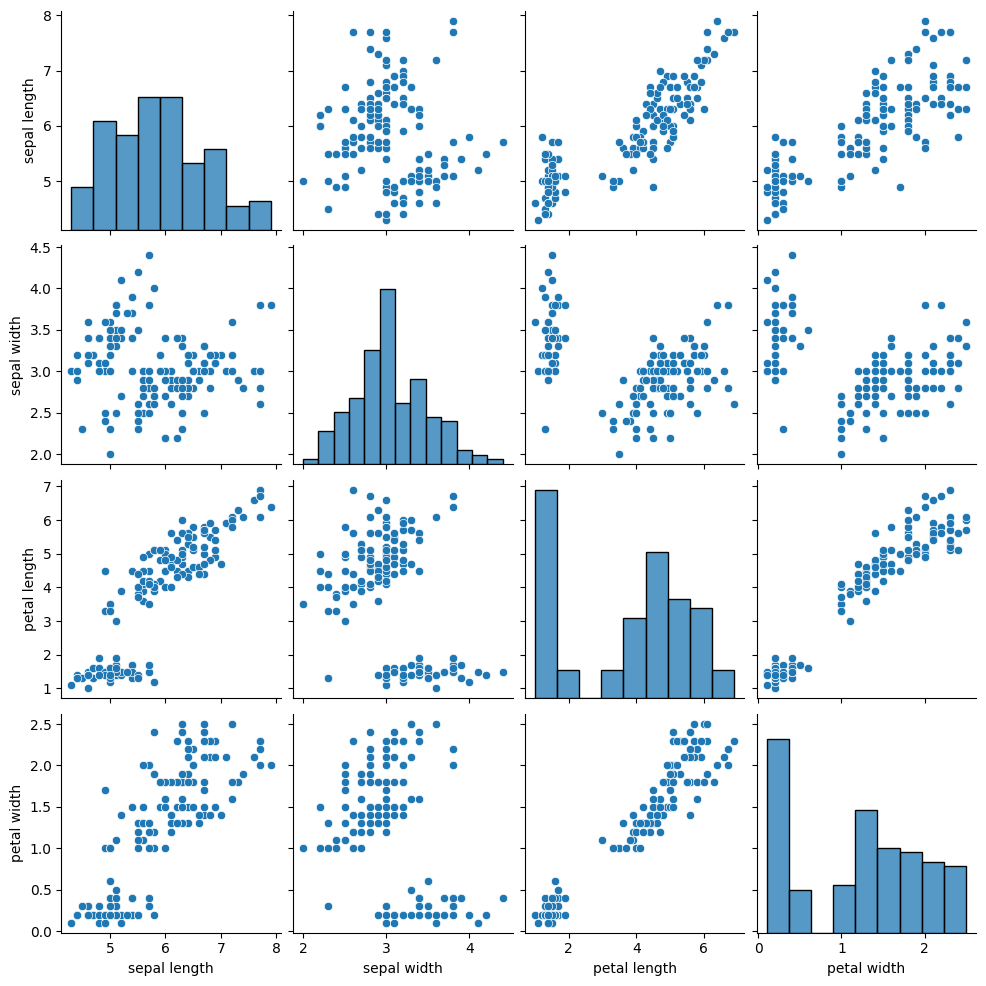

In [75]:
# plot distributions and pairwise relationships for all numeric variables

sb.pairplot(df_iris)

# Summary

So now you should know:

- how plots and figures are created with <font color="green">**seaborn**</font>
- how to do relational plots
- how to do distribution plots
- how to do categorical plots
- how to do matrix plots
- how to do regression plots

## Exercise 1

a) Create a cleaned up genes table:

- load the genes table from last time.
- rename the TPM columns, so that the column label is only the sample name
- set the index to the Ensembl IDs ("gene_stable_id")
- drop all rows with NaNs
-  select only those genes with a TPM larger than zero in **every** sample
- select only genes that are encoding a protein (protein_coding) or a lincRNA
- sort the genes by fold change
- add a column "effect" that indicates, if the gene is up or down-regulated or not significant (let "up" be defined as log2FC larger or equal than 1 and FDR smaller than 0.05 and "down" accordingly smaller than -1)
- add another column with the negative logarithm of 10 of the p value

Display the head of your cleaned DataFrame and check the result.


b) Plot a Volcano Plot using the appropriate Figure-level seaborn function. Color the data points by effect (Hint: you can specify a list of colors using the `palette` parameter). Encode the biotype by marker style and the FDR by size.

## Exercise 2

a) Plot the relationship between all pairwise combination of samples (TPM columns!) 
in a single figure. Which function do you need for that?

b) Plot the same relationship as in a) but now for the logarithmized TPM values. 
Do you see a difference?


## Exercise 3

Plot the pearson correlation coefficients for each pairwise sample versus sample comparison (again based on the logarithmized TPM values).
Add grid lines, annotate the Pearson's r.

## Exercise 4

Plot the distribution of logarithmized TPM values as a histogram for all six samples separately in a single figure. Plot all GFP samples in one row and all WT samples in another row. Add a rug to this and a kernel density.

Then plot the kernel density in a single figure. What can you see?

## Exercise 5

Add the mean of the logarithmized TPMs for all GFP and all WT samples to the DataFrame.
Then create a scatter plot with marginal distributions colored by the effect (see above).

### For your convenience ...

If you did not manage to do all the DataFrame operations required in Exercise 1a) but you still want to do the plots that depend on that table, you can use this file instead:

"data/genes_ex_10_1.csv"

< [9 - Lego brick figures](Python%20Crash%209%20-%20Lego%20brick%20figures.ipynb) | [Contents](Python%20Crash%20ToC.ipynb) >